In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [25]:
df=pd.read_excel(r"Desktop\Car Price Prediction\cars.xlsx")

In [26]:
df.head()

Name                            Owner  Rating  \
0      2021 BMW X5 xDrive40i                  BMW of Norwood      4.6   
1  2018 Audi A3 2.0T Premium   EchoPark Automotive Las Vegas      4.9   
2      2021 Kia Telluride SX             Kentson Car Company      4.9   
3       2018 Ford Taurus SHO           Webb Chevy Plainfield      4.0   
4       2018 Ford Taurus SHO                Al Piemonte Ford      4.6   

      Mileage    price  
0   1,899 mi.  $73,287  
1  13,956 mi.  $30,339  
2  18,283 mi.  $61,750  
3  58,876 mi.  $31,495  
4  44,775 mi.  $37,500

EDA

In [27]:
df.shape

(400, 5)

our data set has 400 rows and 5 columns including our target variable which is price

In [28]:
df.dtypes

Name        object
Owner       object
Rating     float64
Mileage     object
price       object
dtype: object

In our data set Name,owner,mileage and price are categorical variables and rating is numerical.

Let us check for null values

In [29]:
df.isnull().sum()

Name       0
Owner      0
Rating     0
Mileage    0
price      0
dtype: int64

Great our data set do not have any null values.

In [30]:
df.describe()

Rating
count  400.000000
mean     4.565000
std      0.335494
min      3.500000
25%      4.500000
50%      4.600000
75%      4.725000
max      5.000000

In [31]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
data=df.apply(LabelEncoder().fit_transform)
data.head()

Name  Owner  Rating  Mileage  price
0    12      6       4        0     18
1     2      9       7        5      3
2    15     12       7        8     16
3     5     18       1       17      4
4     5      0       4       14      8

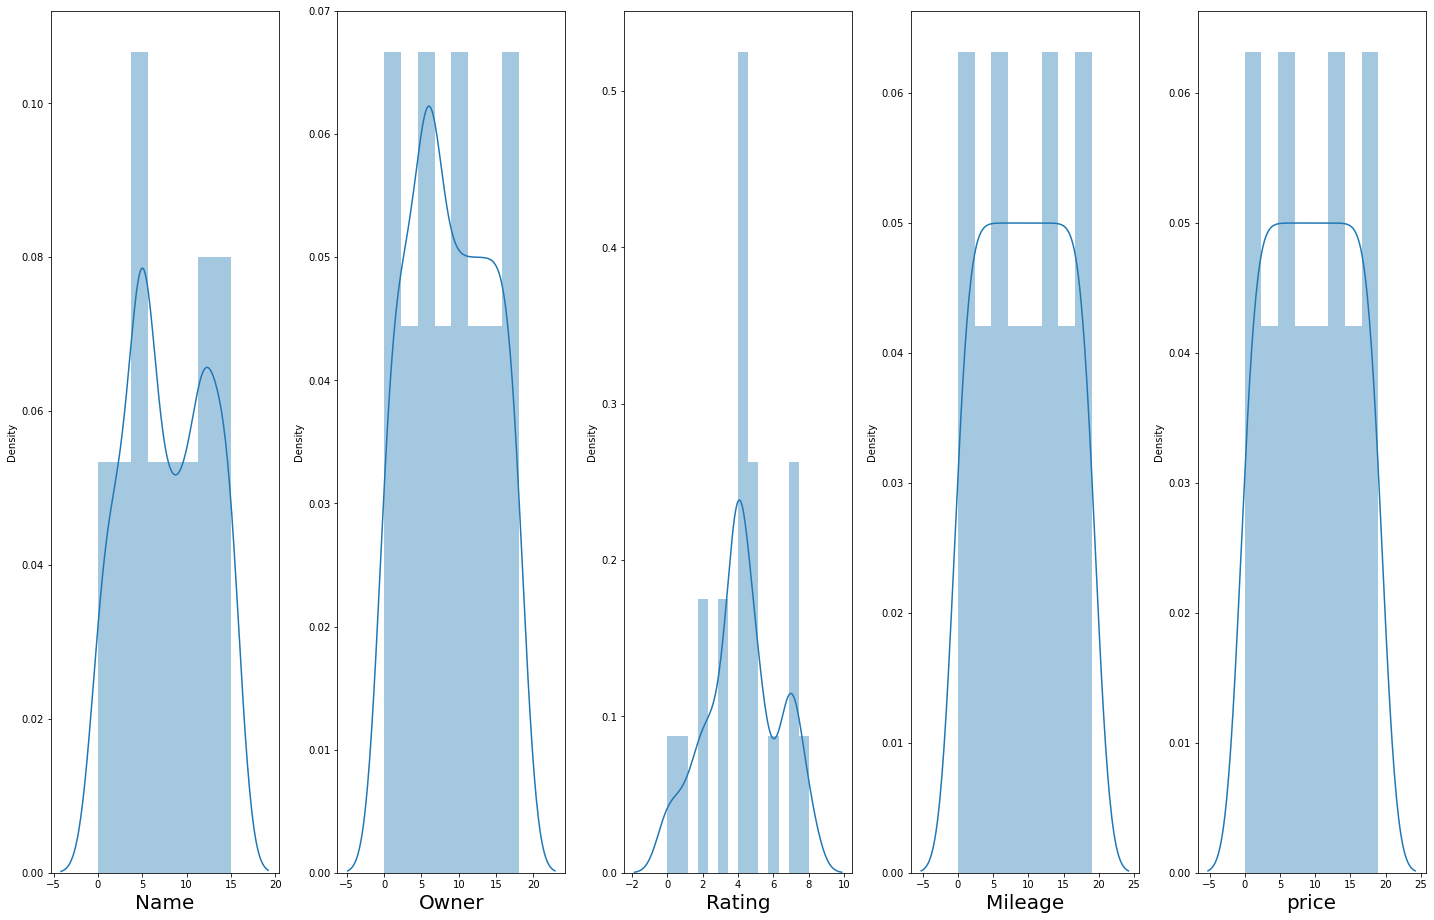

In [32]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=10:
        ax=plt.subplot(2,5,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

Great all the data is evenly  distributed and there is no skewness in our data we can proceed further.

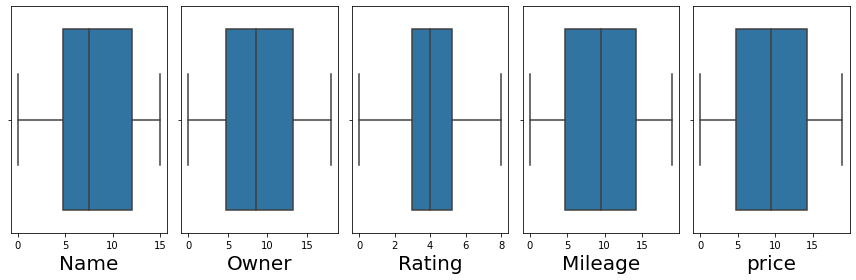

In [33]:
plt.figure(figsize=(12,15),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=17:
        ax=plt.subplot(4,5,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
        plotnumber+=1
plt.tight_layout()

Our data set do not have any outliers

<AxesSubplot:>

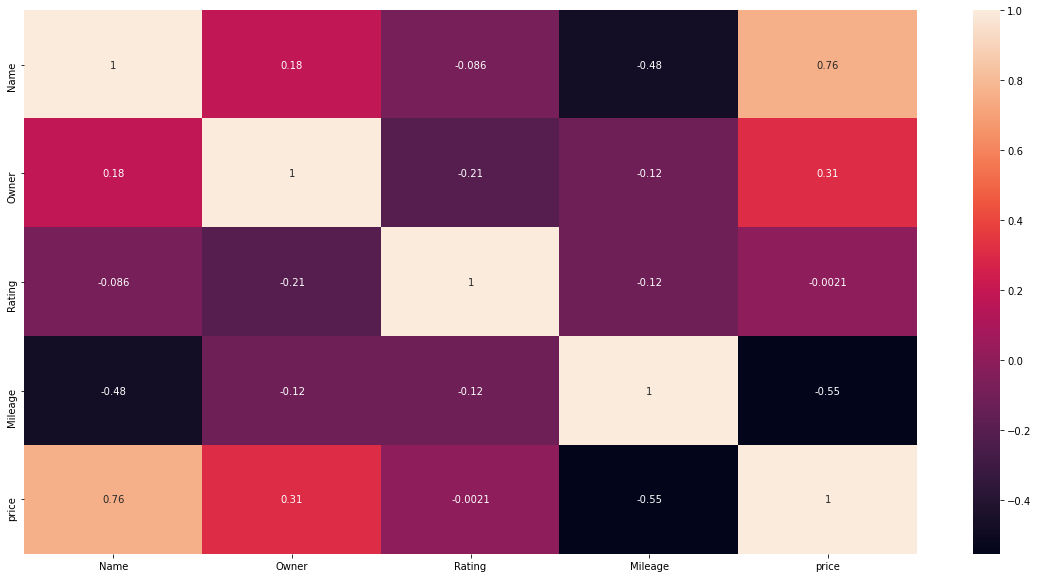

In [34]:
corr=data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True)

From the above output we can see mileage is least corelated variable but let us proceed further with out removing them.

In [35]:
x=data.drop(columns=['price'])
y=data['price']

In [36]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [38]:
from sklearn.tree import DecisionTreeRegressor
maxAccu=0
maxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    mod=DecisionTreeRegressor()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print("Best Accuracy is:",maxAccu,"on Random state:",maxRs)

Best Accuracy is: 1.0 on Random state: 1


In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [40]:
regression=LinearRegression()

In [41]:
regression.fit(x_train,y_train)

LinearRegression()

In [42]:
regression.score(x_test,y_test)

0.6894288064278433

In [43]:
y_pred=regression.predict(x_test)

In [44]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6894288064278433

In [47]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
ridgecv=RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [48]:
ridgecv.alpha_

0.011

In [49]:
ridge_model=Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.011)

In [50]:
ridge_model.score(x_test,y_test)

0.6894289184834056

After using Grid search cv And cross validation still our model gives 69% accuracy

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto'}


In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
rf=RandomForestRegressor(criterion="mse",max_features="sqrt")
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)
rfs=r2_score(y_test,pred_decision)
print('R2 SCORE:',rfs*100)
rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print("Cross val score:",rfc*100)

R2 SCORE: 100.0
Cross val score: 100.0


In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
parameters={'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}
dt=DecisionTreeRegressor()
clf=GridSearchCV(dt,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto'}


In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
dt=DecisionTreeRegressor(criterion="mse",max_features="auto")
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
pred_decision=dt.predict(x_test)
dts=r2_score(y_test,pred_decision)
print('R2 SCORE:',dts*100)
dtscore=cross_val_score(dt,x,y,cv=5)
dtc=dtscore.mean()
print("Cross val score:",dtc*100)

R2 SCORE: 100.0
Cross val score: 100.0


Both the Decision tree and Random forest regressor gives us 100 Percent of accuracy

In [62]:
import pickle
filename="Cars.pkl"
pickle.dump(rf,open(filename,'wb'))